In [0]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.nn import functional as F
from torchvision import models,transforms

In [0]:
img_path = './test_images/' 

In [0]:
#image visualization
def show_image(path):
    img = Image.open(path)
    img_arr = np.array(img)
    plt.figure(figsize=(5,5))
    plt.imshow(np.transpose(img_arr, (0, 1, 2)))

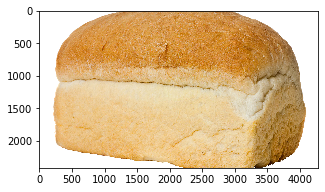

In [4]:
show_image('/test_images/bread_1.jpg')

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [6]:
# model architecture
model = models.resnet152(pretrained=False).to(device)
model.fc = nn.Sequential(
               nn.Linear(2048, 128),
               nn.ReLU(inplace=True),
               nn.Linear(128, 2)).to(device)

model.load_state_dict(torch.load('/models/buttbread_resnet152_3.h5'))

<All keys matched successfully>

In [0]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

test_transforms = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor(), normalize])

In [0]:
#set of images that you want to predict
img_paths = ['/test_images/bread_1.jpg',
             '/test_images/bread_2.jpg',
             '/test_images/bread_3.jpg',
             '/test_images/corgi_1.jpg',
             '/test_images/corgi_2.jpg',
             '/test_images/corgi_3.jpg']

In [0]:
img_list = [Image.open(img_path) for img_path in img_paths]

In [0]:
img_batch = torch.stack([test_transforms(img).to(device)for img in img_list])

In [0]:
pred_logits_tensor = model(img_batch)
pred_probs = F.softmax(pred_logits_tensor, dim=1).cpu().data.numpy()

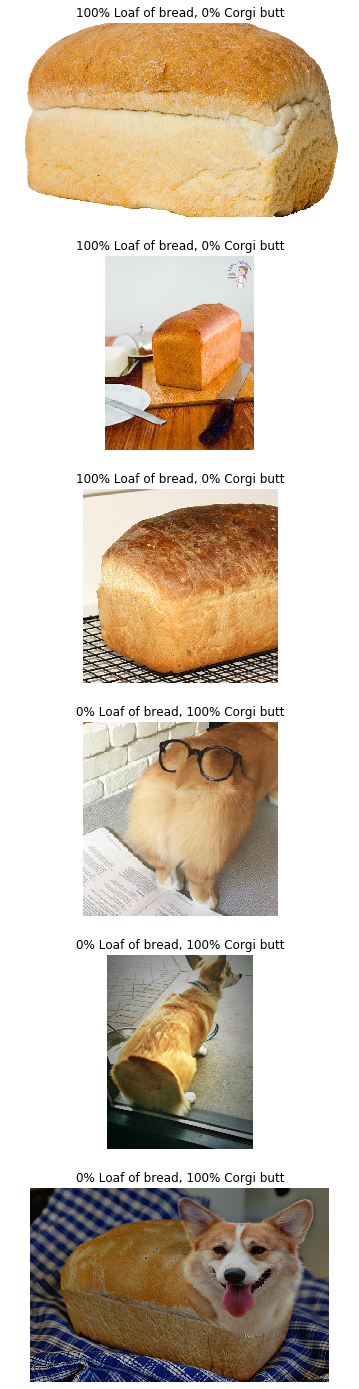

In [12]:
fig, axs = plt.subplots(len(img_list),1, figsize=(25, 25))
for i, img in enumerate(img_list):
    ax = axs[i]
    ax.axis('off')
    ax.set_title("{:.0f}% Loaf of bread, {:.0f}% Corgi butt".format(100*pred_probs[i,0],100*pred_probs[i,1]))
    ax.imshow(img)